In [ ]:
Url for notebook:

https://colab.research.google.com/drive/10WY7KtAF89wXMGJT3koTTB_bFjWtaDug?usp=sharing

My Email: l175252973@gmail.com<br/>
My Name: PAK KA YEE<br/>
My SID: 55692027 


## MA4550 THA-Two

### Question 1

Compute by hand the values of w1+, w2+, w3+, w4+, w5+ , w6+ , w7+ , and w8+ after one forward and backward pass. The network is the same one shown in Lecture two.

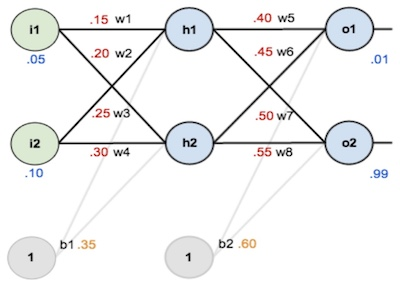



Answer 1:

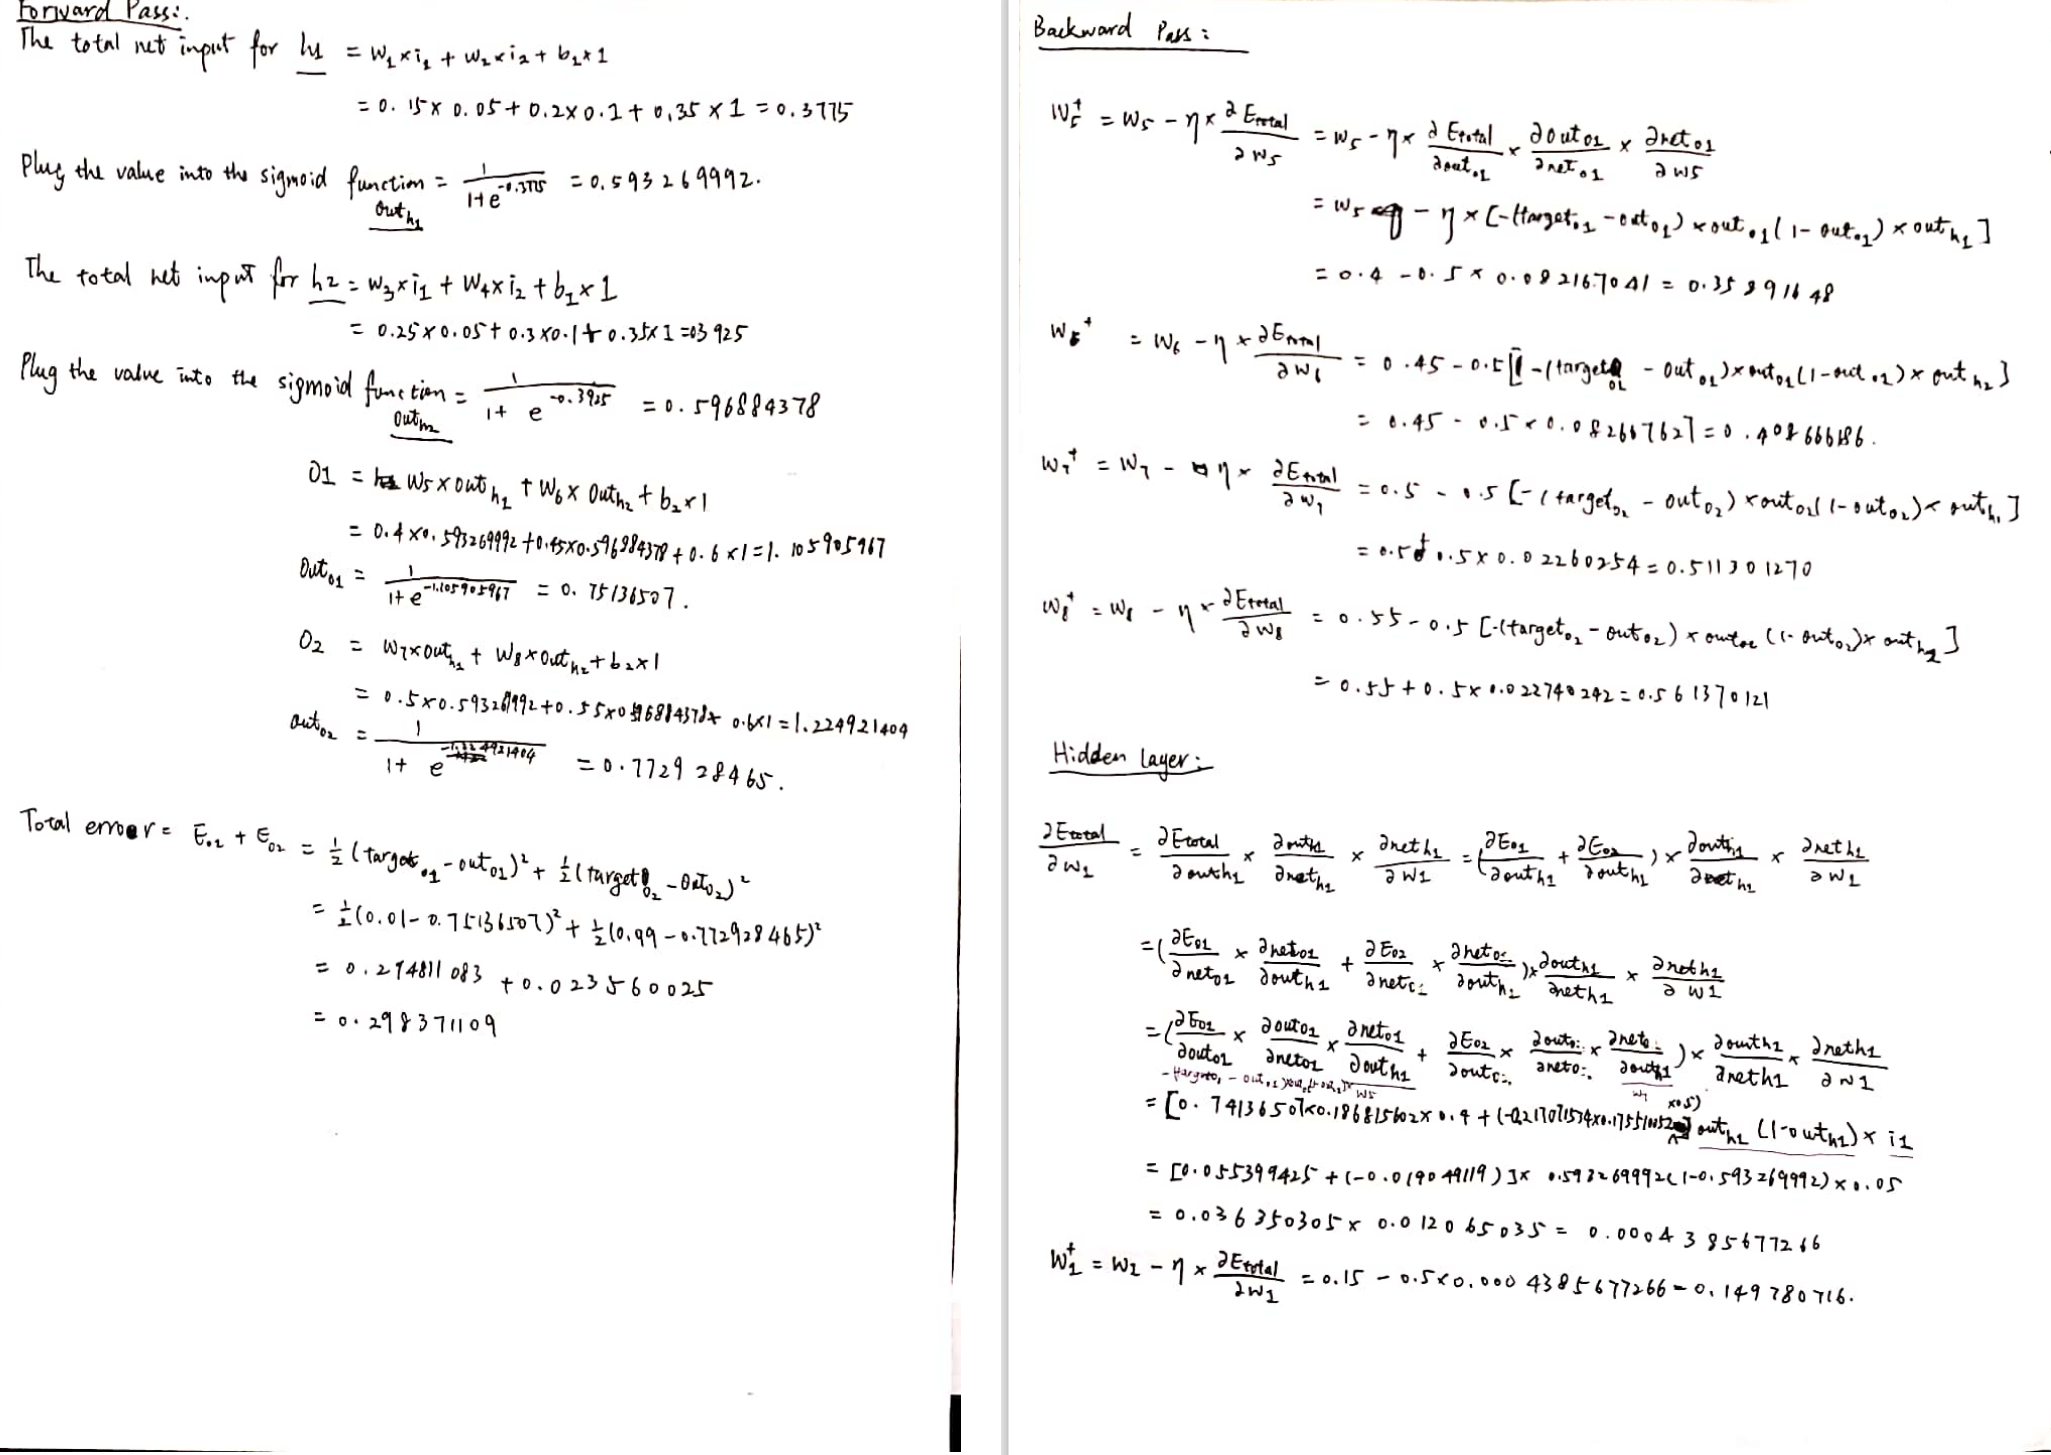


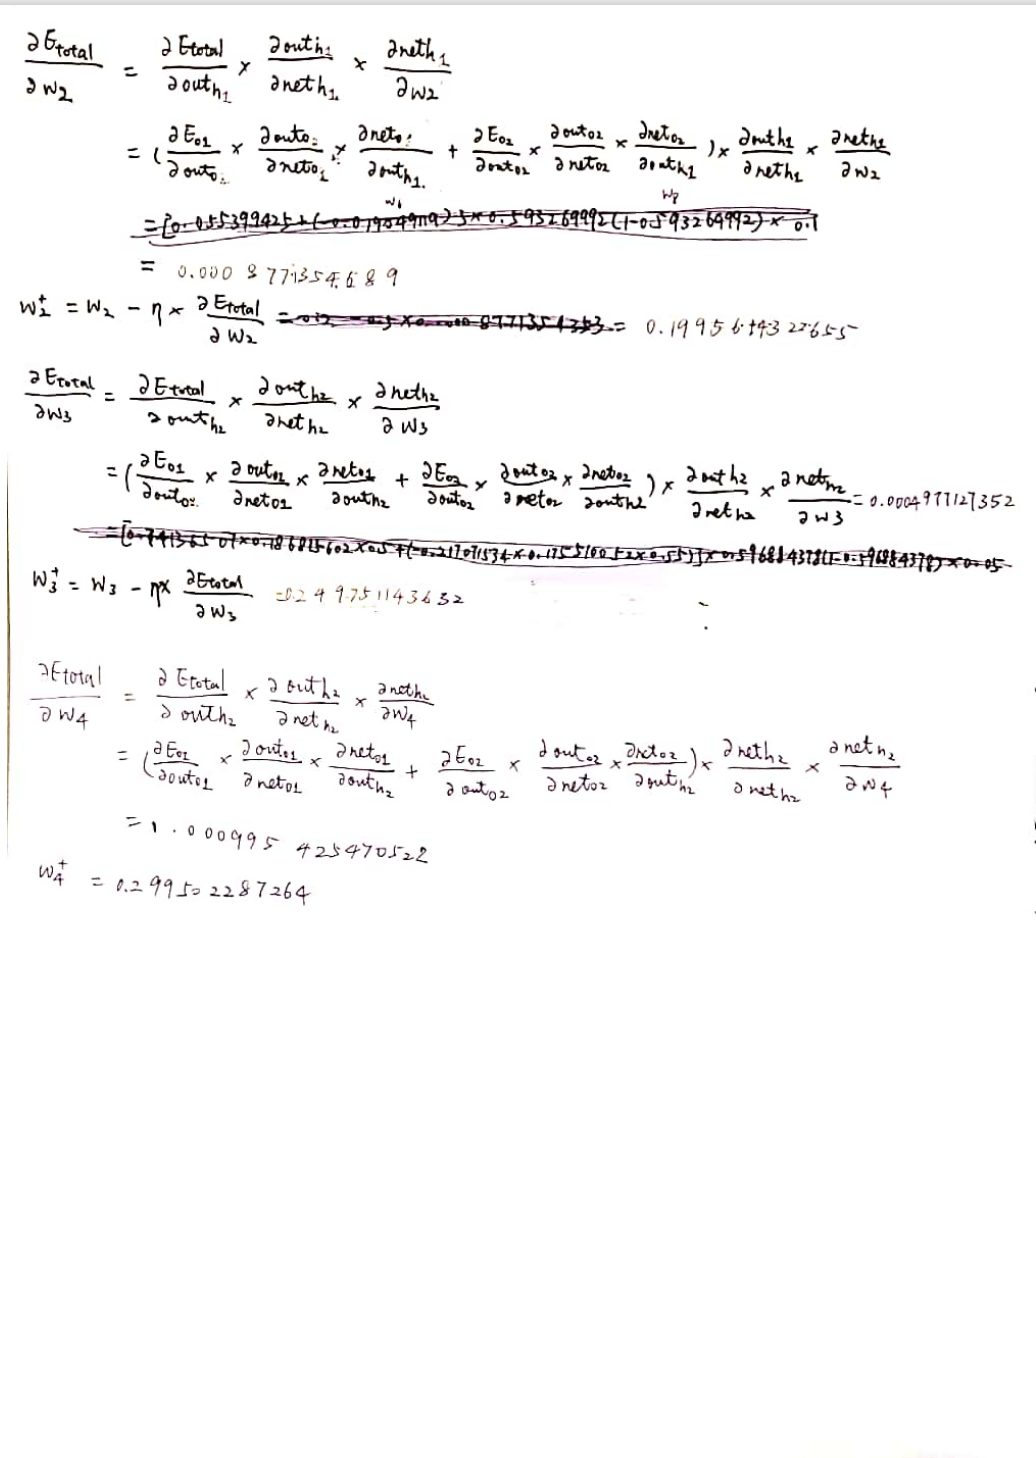



### Question 2

Write a python code to verify the values to question #1.



In [ ]:
# imports
import numpy as np

# some useful utilities
def sigmoid(X):
   return 1/(1+np.exp(-X))
   
   


# input
i1 = 0.05
i2 = 0.10

# weights
w1 = 0.15
w2 = 0.20
w3 = 0.25
w4 = 0.30
w5 = 0.40
w6 = 0.45
w7 = 0.50
w8 = 0.55

# bias
b1 = 0.35
b2 = 0.60

# output
target_o1 = 0.01
target_o2 = 0.99

# learning rate eta
eta = 0.5

# input layer
input_layer = np.array(
    [i1, i2, 1]
)

# hidden layer weight
h1_weights = np.array(
    [w1, w2, b1]
)

h2_weights = np.array(
    [w3, w4, b1]
)

# output layer weights
o1_weights = np.array(
    [w5, w6, b2]
)

o2_weights = np.array(
    [w7, w8, b2]
)

# FORWARD PASS
# calculate the hidden layer
net_h1 = h1_weights @ input_layer
net_h2 = h2_weights @ input_layer

out_h1 = sigmoid(net_h1)
out_h2 = sigmoid(net_h2)

hidden_layer = np.array(
    [out_h1, out_h2, 1]
)

# calculate the predicted output layer
o1 = o1_weights @ hidden_layer
o2 = o2_weights @ hidden_layer

out_o1 = sigmoid(o1)
out_o2 = sigmoid(o2)

output_layer = np.array(
    [out_o1, out_o2, 1]
)

# calculate the total error = e_o1 + e_o2
e_o1 = eta * (target_o1 - out_o1) ** 2
e_o2 = eta * (target_o2 - out_o2) ** 2

total_error = e_o1 + e_o2



In [ ]:
# BACKWARD PASS
# calculate the first backward layer: w5+, w6+, w7+, w8+; w5+ = w5 - eta*[-(target_o1-out_o1)*out_o1*(1-out_o1)*out_h1]
w5_plus = w5 - eta * ( - ( target_o1 - out_o1 ) * out_o1 * ( 1 - out_o1 ) * out_h1)
w6_plus = w6 - eta * ( - ( target_o1 - out_o1 ) * out_o1 * ( 1 - out_o1 ) * out_h2)
w7_plus = w7 - eta * ( - ( target_o2 - out_o2 ) * out_o2 * ( 1 - out_o2 ) * out_h1)
w8_plus = w8 - eta * ( - ( target_o2 - out_o2 ) * out_o2 * ( 1 - out_o2 ) * out_h2)

# the first backward pass hidden layer
d_totalError_d_w1 = ( - ( target_o1 - out_o1 ) * out_o1 * ( 1 - out_o1 ) * w5 + (- ( target_o2 - out_o2 ) * out_o2 * ( 1 - out_o2 ) * w7)) * out_h1 *(1 - out_h1) * i1
d_totalError_d_w2 = ( - ( target_o1 - out_o1 ) * out_o1 * ( 1 - out_o1 ) * w5 + (- ( target_o2 - out_o2 ) * out_o2 * ( 1 - out_o2 ) * w7)) * out_h1 *(1 - out_h1) * i2
d_totalError_d_w3 = ( - ( target_o1 - out_o1 ) * out_o1 * ( 1 - out_o1 ) * w6 + (- ( target_o2 - out_o2 ) * out_o2 * ( 1 - out_o2 ) * w8)) * out_h2 *(1 - out_h2) * i1
d_totalError_d_w4 = ( - ( target_o1 - out_o1 ) * out_o1 * ( 1 - out_o1 ) * w6 + (- ( target_o2 - out_o2 ) * out_o2 * ( 1 - out_o2 ) * w8)) * out_h2 *(1 - out_h2) * i2

w1_plus = w1 - eta * d_totalError_d_w1
w2_plus = w2 - eta * d_totalError_d_w2
w3_plus = w3 - eta * d_totalError_d_w3
w4_plus = w4 - eta * d_totalError_d_w4

print(w1_plus)
print(w2_plus)
print(w3_plus)
print(w4_plus)
print(w5_plus)
print(w6_plus)
print(w7_plus)
print(w8_plus)


0.1497807161327628
0.19956143226552567
0.24975114363236958
0.29950228726473915
0.35891647971788465
0.4086661860762334
0.5113012702387375
0.5613701211079891



### Question3

Use the example shown on the right, write a python code to compute the values of the convolution process using im2col scheme.

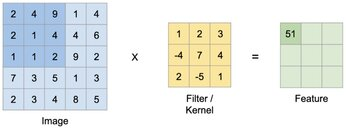


### Answer 3:

In [9]:
import numpy as np
image = np.array([
                  [2, 4, 9, 1, 4],
                  [2, 1, 4, 4, 6],
                  [1, 1, 2, 9, 2],
                  [7, 3, 5, 1, 3],
                  [2, 3, 4, 8, 5]
])

filter = np.array ([
                    [1, 2, 3],
                    [-4, 7, 4],
                    [2, -5, 1]
])

# we flatten the image to column then multiply the flattened image with the flattened filter, then resahpe the flattened feature
def im2col(image, filter):

# flatten image and filter
    k = filter.shape[0]

    flatten_image = []
    for i in range(image.shape[0] - k + 1):
        for j in range(image[0].shape[0] - k + 1):
            flatten_image.append(image[i:i+k, j: j+k].flatten())

    flatten_image = np.array(flatten_image)

    flatten_filter = filter.flatten()

# flattened feature
    flatten_feature = flatten_image @ flatten_filter

# resahpe the flattened feature
    return flatten_feature.reshape((3,3))

im2col(image, filter)



array([[ 51,  66,  20],
       [ 31,  49, 101],
       [ 15,  53,  -2]])

### Question 4

CIFAR stands for Canadian Institute For Advanced Research and 10 refers to 10 classes. The CIFIR 10 dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

Convert CIFIR-10 images to greyscale images or reshape the CIFIR-10 images to vectors similar to that of MNIST dataset.

Modify the simple MLP TensorFlow tutorial which uses the MNIST data to train the modified CIFIR 10 dataset. Plot the loss and accuracy of the training and testing results.

Helpful web links:

https://www.tensorflow.org/tutorials/quickstart/beginner

https://www.tensorflow.org/api_docs/python/tf/image/rgb_to_grayscale

https://datascience.stackexchange.com/questions/24459/how-to-give-cifar-10-as-an-input-to-mlp


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

from matplotlib import pyplot as plt


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# convert to gray scale
x_train = tf.reshape(
    tf.image.rgb_to_grayscale(x_train),
    x_train.shape[:-1]
)
x_test = tf.reshape(
    tf.image.rgb_to_grayscale(x_test),
    x_test.shape[:-1]
)

170500096/170498071 [==============================] - 2s 0us/step


Epoch 1/100
1563/1563 [==============================] - 4s 2ms/step - loss: 2.1721 - accuracy: 0.1978 - val_loss: 2.0219 - val_accuracy: 0.2704
Epoch 2/100
1563/1563 [==============================] - 3s 2ms/step - loss: 2.0432 - accuracy: 0.2611 - val_loss: 1.9733 - val_accuracy: 0.2967
Epoch 3/100
1563/1563 [==============================] - 3s 2ms/step - loss: 2.0019 - accuracy: 0.2748 - val_loss: 1.9281 - val_accuracy: 0.3133
Epoch 4/100
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9793 - accuracy: 0.2815 - val_loss: 1.9161 - val_accuracy: 0.3194
Epoch 5/100
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9623 - accuracy: 0.2908 - val_loss: 1.8904 - val_accuracy: 0.3312
Epoch 6/100
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9519 - accuracy: 0.2950 - val_loss: 1.8874 - val_accuracy: 0.3333
Epoch 7/100
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9404 - accuracy: 0.3002 - val_loss: 1.8760 - val_ac

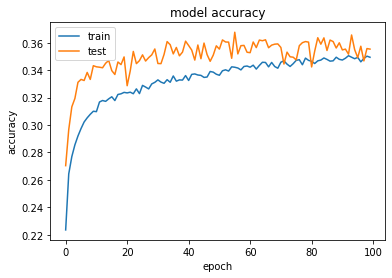

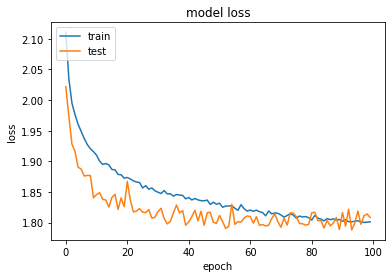

In [3]:
# mlp
# mnist = tf.keras.datasets.mnist

# (x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255, x_test / 255

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data =(x_test, y_test), epochs=100)

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
history


### Question 5
Repeat question #4 using CNN ResNet18 network.


In [4]:
from tensorflow.python.keras.applications.resnet import ResNet, stack1
import tensorflow as tf

def stack_fn(x):
    x = stack1(x, 64, 2, name='conv2')
    x = stack1(x, 128, 2, name='conv3')
    x = stack1(x, 256, 2, name='conv4')
    return stack1(x, 512, 2, name='conv5')

model = ResNet(stack_fn, False, True, 'resnet18', True, None, None, (32,32,1), None, 10)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 20) 

Epoch 1/20
1563/1563 [==============================] - 39s 20ms/step - loss: 2.4012 - accuracy: 0.2869
Epoch 2/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.9222 - accuracy: 0.3789
Epoch 3/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.9784 - accuracy: 0.3754
Epoch 4/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.8568 - accuracy: 0.3952
Epoch 5/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.7147 - accuracy: 0.4317
Epoch 6/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.6044 - accuracy: 0.4500
Epoch 7/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.4222 - accuracy: 0.5127
Epoch 8/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.3685 - accuracy: 0.5308
Epoch 9/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.5198 - accuracy: 0.4783
Epoch 10/20
1563/1563 [==============================] - 32s 20m

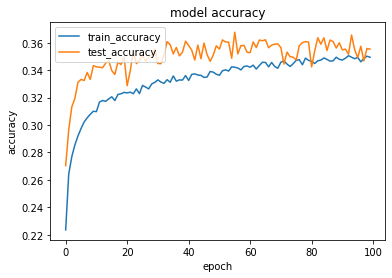

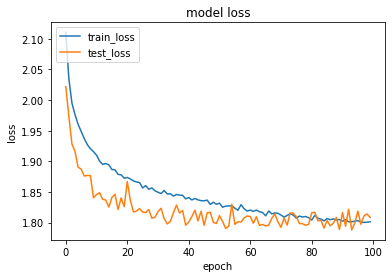

In [6]:
# plot for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'test_accuracy'], loc='upper left')
plt.show()

# plot for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss'], loc='upper left')
plt.show()